<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [16]:
# installs.
!pip install squarify
!python -m spacy download en_core_web_lg
# imports.
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
import spacy
from spacy.tokenizer import Tokenizer
import squarify


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [3]:
# read in the csv file.
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv', index_col=0)
# show the dataframe shape.
print(df.shape)
# show the data frame with headers.
df.head()

(426, 2)


,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
# show the 1st row in the description column.
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [0]:
# create a function to clean the text of the description column.
def clean_text(text):
    # remove the first char 'b'.
    text = text[1:]                  
    # remove the newline.             
    text = text.replace('\\n', ' ')          
    # remove any html.     
    text = BeautifulSoup(text, "lxml").get_text()
    # remove any forward slashes.
    text = text.replace('/', ' ')                 
    # keep letters and numbers only.
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)   
    # lower case all the text.
    text = text.lower()                         
    # remove any special characters. 
    text = re.sub(r'(x.[0-9])', '', text)      

    return text

In [0]:
# create a for loop to apply the clean_text function to all the rows.
for i in range (0, len(df)):
    df['description'][i] = clean_text(df['description'][i])

In [39]:
# show the 6th rows, description.
df['description'][5]

'create various business intelligence analytical reports visualization and dashboards with bi tools like tableau power bi or similar utilize experience in scientific data logic programming and calculated columns and decision making develop and maintain dashboards for kpis purchase trends with time series and customer flows with tableau and teradata develop recommendation models utilizing machine learning and predictive analysis with supervised and unsupervised algorithms like random forest support vector machine and kmeans clustering utilize experience with sql with strong concepts of database data warehouse and metadata work closely with frontend web developer and ux designer on improving online shopping experience and deploying business strategies like promotion or similar analyze customer behaviors and purchase trends to create customized recommended items conduct and apply a b test to monitor and test new or modified features for online shopping experiences across desktop and mobil

In [7]:
# show the datafame with headers.
df.head()

,description,title
0,job requirements conceptual understanding in m...,Data scientist
1,job description as a data scientist 1 you wil...,Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,4969 6756 a monthcontractunder the general su...,Data Scientist
4,location usa multiple locations 2 years of an...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [0]:
# set the nlp with "en_core_web_lg" file.
nlp = spacy.load("en_core_web_lg")
# set the tokenizer on nlp.vocab.
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# add stop words to the nlpDefaults stop words list.
STOP_WORDS = nlp.Defaults.stop_words.union(['datum', 'year', 'apply', 'understand', 'work',
                                            'opportunity', 'new', 'use', 'ability', 'company', 
                                            'include'])

In [10]:
# TOKENIZER PIPE, removing stop words, blank words, and lemmatizing.
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [job, requirement, conceptual, machine, learn,...
1    [job, description, scientist, 1, help, build, ...
2    [scientist, consult, business, responsible, an...
3    [4969, 6756, monthcontractunder, general, supe...
4    [location, usa, multiple, location, 2, analyti...
Name: tokens, dtype: object

In [0]:
# create a function to count all words in the dataframe.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [17]:
# create a data frame for the word counts.
wc = count(df['tokens'])
# show the data frame with headers.
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
62,experience,410,1999,1.0,0.016486,0.016486,0.962441
292,team,370,1363,2.0,0.011240,0.027726,0.868545
262,business,324,1251,3.0,0.010317,0.038043,0.760563
27,model,330,1248,4.0,0.010292,0.048335,0.774648
25,learn,343,1065,5.0,0.008783,0.057118,0.805164
52,science,338,978,6.0,0.008065,0.065183,0.793427
266,product,275,892,7.0,0.007356,0.072540,0.645540
279,analysis,317,812,8.0,0.006696,0.079236,0.744131
324,analytics,249,732,9.0,0.006037,0.085273,0.584507
151,build,295,721,10.0,0.005946,0.091219,0.692488


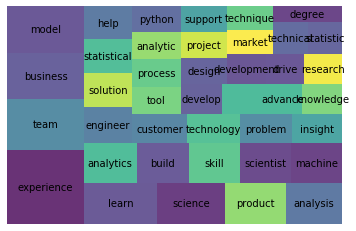

In [18]:
# set the top 20 word counts.
wc_top20 = wc[wc['rank'] <= 40]
# use squarify to plot top 20.
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
# remove the axis.
plt.axis('off')
# show the plot.
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
# create a function to use the spacy tokenizer.
def tokenize(document):    
    doc = nlp(document)   
    return [token.lemma_.strip() 
    for token in doc if (token.is_stop != True) 
    and 
    (token.is_punct != True) and
    (token.text != ' ')]

In [41]:
# set the transformer, instantiate.
vect = CountVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)
# fit the trasnformer on the data.
vect.fit(df['description'])
# transform the data.
dtm = vect.transform(df['description'])
# get the word counts for each document.
dtm_wc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
# show the dataframe with headers.
dtm_wc.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,-PRON-,0,00,02,02115,03,030,030547069,04,06366,08,1,10,100,1000,100000,100000125000,1001,1008,100908,100x,1020,1026036,105000,1079302,1082692,10b,10ms,10person,10x,11,110k,114157802,1159,11695,12,120,1200,120000,...,xefxacnding,xefxbbxbf,xgboost,xp,xpo,y,yardsxae,yeara,yearas,yearcollect,yeardescription,yearjob,yearlrs,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yeti,yield,york,young,youprotect,yoursis,youtube,yrs,zenreach,zero,zeus,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [23]:
sum_words = dtm.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('experience', 1936),
 ('team', 1363),
 ('business', 1251),
 ('science', 978),
 ('product', 892),
 ('model', 866),
 ('data', 843),
 ('analytic', 837),
 ('analysis', 811),
 ('skill', 720)]

In [24]:
# create a data frame of the 20 most frequest words.
cv_top20 = pd.DataFrame(words_freq[:20]) 
# show the data frame with headers.
cv_top20.head()

,0,1
0,experience,1936
1,team,1363
2,business,1251
3,science,978
4,product,892


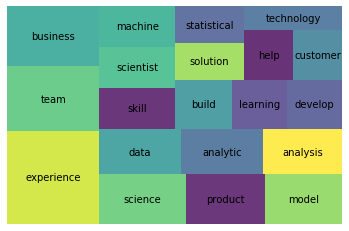

In [25]:
# use squarify to plot top 20.
squarify.plot(sizes=cv_top20[1], label=cv_top20[0], alpha=.8 )
# remove axis.
plt.axis('off')
# show the plot.
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [26]:
# set the transformer, instantiate.
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)
# fit the trasnformer on the data.
tfidf.fit(df['description'])
# transform the data.
dtm = tfidf.transform(df['description'])
# get the word counts for each document.
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
# show the dataframe with headers.
dtm.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,-PRON-,0,00,02,02115,03,030,030547069,04,06366,08,1,10,100,1000,100000,100000125000,1001,1008,100908,100x,1020,1026036,105000,1079302,1082692,10b,10ms,10person,10x,11,110k,114157802,1159,11695,12,120,1200,120000,...,xefxacnding,xefxbbxbf,xgboost,xp,xpo,y,yardsxae,yeara,yearas,yearcollect,yeardescription,yearjob,yearlrs,yearsexperience,yearsummary,yearthe,yeartitle,yearworking,yes,yeti,yield,york,young,youprotect,yoursis,youtube,yrs,zenreach,zero,zeus,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110293,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [27]:
# set NN.
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
# fit NN on data.
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
# create the ideal job.
ideal_job = ["""The ideal job would include python, sql, and artificial intelligence in the health industry"""]

In [35]:
# query for Sim of Random doc to BBC.
new = tfidf.transform(ideal_job)
# show the dense matrix.
nn.kneighbors(new.todense())

(array([[1.28119701, 1.32456494, 1.32799268, 1.33178145, 1.33529479,
         1.3356012 , 1.33637389, 1.33656702, 1.3405174 , 1.34178235]]),
 array([[237, 313, 213, 231,  84,  51, 396, 406, 425, 100]]))

In [36]:
# show row #237's description.
df['description'][237]

'microsoft envisions a world where passionate innovators come to collaborate envisioning what can be and taking their careers places they simply couldnt anywhere else this is a world of more possibility more innovation more openness and skysthelimit thinking  a cloudenabled world our mission is to empower every person and every organization on the planet to achieve more this mission is ambitious and at the core of what our customers and employees care deeply about we have unique capability in harmonizing the needs of both individuals and organizations we deeply care about taking our ideals and vision global and making a difference in lives and organizations in all corners of the planet we are always learning insatiably curious we lean into uncertainty take risks and learn quickly from our mistakes we build on each others ideas because we are better together we stand in awe of what humans dare to achieve and are motivated every day to empower others to do more and achieve more through o

In [37]:
# show row #313's description.
df['description'][313]

'hinge healths mission is to improve the lives of people suffering from chronic conditions by digitizing the delivery of care  starting with musculoskeletal health our vision is to be the worlds most patientcentered digital hospital were already achieving remarkable outcomes  helping people overcome chronic pain avoid surgeries return to work and get back to doing the things they love weve raised close to 37m and our growth shows no sign of slowing  we are looking for a data scientist with strong statistical expertise to analyze data sets for both internal use and external publication you would work with internal clinical data and external claims data to deliver insights into the effectiveness of our program and to develop prediction models for improving the value of the hinge health system  our ideal candidate has a good foundation in statistics and a strong grasp of predictive modeling and machine learning as well as experience with health data and engineering this role would be work

In [38]:
# show row #213's description.
df['description'][213]

'houston methodist hm is looking for passionate data scientists to join the center for outcomes research cor to lead and develop informatics initiatives that transform healthcare via data science and informatics the goal of the hm cor informatics initiative is to benefit patients and society as a whole by utilizing the skills and tools of data science to model patient populations clinically and economically within the context of the patient the health care and hospital systems so that we can optimize business and clinical operations improve patient care reduce costs and position hm to more effectively address population health and other strategic health care needs into the future the responsibility of the data scientist is to address the best uses of data science and informatics resources for hm clinical and business operations and patient care including the organizations needs to assess and understand clinical financial operational population health and marketing data the data scienti

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 